In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib
import random as rdm
import os
np.random.seed(0)
import seaborn as sns
from scipy.optimize import linprog

In [2]:
#problem(1)
Rfunc1 = np.zeros((10,10))
Rfunc1[-1][-1] = 1.0
Rfunc2 = np.zeros((10, 10))
Rfunc2[1:7,4] = -100.0
Rfunc2[1,5] = -100.0
Rfunc2[1:4,6] = Rfunc2[7:9,6] = -100.0
Rfunc2[3,7] = Rfunc2[7,7] = -100.0
Rfunc2[3:8,8] = -100.0
Rfunc2[-1][-1] = 10.0

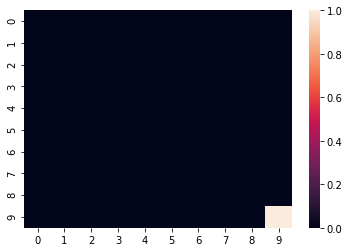

In [3]:
hm1 = sns.heatmap(Rfunc1)

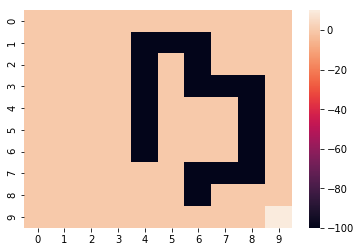

In [4]:
hm2 = sns.heatmap(Rfunc2)

In [5]:
#problem2
width = 10
height = 10
tp = np.zeros((height * width, 5, 4)) # third dimension is direction, last denotes action
#direction to next state 0 : up 1 : right 2 : down 3 : left 4: stay
#action 0 : up 1 : right 2 : down 3 : left
w = 0.1
dx = [0, 1, 0, -1, 0]
dy = [-1, 0, 1, 0, 0]

In [6]:
def isCorner(x, y, height, width):
    return (((y == height - 1) or (y == 0)) and ((x == width - 1) or (x == 0)))
def isEdge(x, y, height, width):
    return (x == 0) or (x == height - 1) or (y == 0) or(y == width - 1)
def offGrid(x, y, height, width):
    return (x < 0) or (x >= height) or (y < 0) or(y >= width)

In [7]:
def cornerSol(x, y, tp, height, width, w):
    state = x * height + y
    for i in range(4): #action
        if(offGrid(x + dx[i], y + dy[i], height, width)):
            for j in range(4):
                if not offGrid(x + dx[j], y + dy[j], height, width):
                    tp[state][j][i] = w / 4.0
            tp[state][4][i] = 1 - w / 2.0
        else:
            for j in range(4):
                if i == j:
                    tp[state][j][i] = 1 - w + w / 4.0
                elif not offGrid(x + dx[j], y + dy[j], height, width):
                    tp[state][j][i] = w / 4.0
            tp[state][4][i] = w / 2.0
            
def edgeSol(x, y, tp, height, width, w):
    state = x * height + y
    for i in range(4): #action
        if(offGrid(x + dx[i], y + dy[i], height, width)):
            for j in range(4):
                if not offGrid(x + dx[j], y + dy[j], height, width):
                    tp[state][j][i] = w / 4.0
            tp[state][4][i] = 1 - w + w / 4.0
        else:
            for j in range(4):
                if i == j:
                    tp[state][j][i] = 1 - w + w / 4.0
                elif not offGrid(x + dx[j], y + dy[j], height, width):
                    tp[state][j][i] = w / 4.0
            tp[state][4][i] = w / 4.0   
            
def innerSol(x, y, tp, height, width, w):
    state = x * height + y
    for i in range(4): # atcion
        for j in range(4):
            if i == j:
                tp[state][j][i] = 1 - w + w / 4.0
            else:
                tp[state][j][i] = w / 4.0

In [8]:
w = 0.1
for i in range(height * width): #calculate transition prob
    x = i // height
    y = i % height
    if isCorner(x, y, height, width):
        cornerSol(x, y, tp, height, width, w)
    elif isEdge(x, y, height, width):
        edgeSol(x, y, tp, height, width, w)
    else:
        innerSol(x, y, tp, height, width, w)

In [9]:
def calStateValue(state, tp, Rfunc, Vs, discount):
    value = np.zeros(4)
    x = state // height
    y = state % height
    for action in range(4):
        for i in range(5):
            x1 = x + dx[i]
            y1 = y + dy[i]
            if offGrid(x1, y1, height, width):
                continue
            state1 = x1 * height + y1
            value[action] += tp[state][i][action] * (Rfunc[y1][x1] + discount * Vs[state1])
    return value
def calVs(Vs, tp, Rfunc, discount, theta):
    while True:
        delta = 0.0
        for s in range(width * height):
            actionValue = calStateValue(s, tp, Rfunc, Vs, discount)
            maxActionValue = max(actionValue)
            delta = max(np.abs(maxActionValue - Vs[s]), delta)
            Vs[s] = maxActionValue
        if delta < theta:
            break

In [10]:
Vs1 = np.zeros(height * width)
discount = 0.8
theta = 0.01
calVs(Vs1, tp, Rfunc1, discount, theta)#calculate state value for each state

In [11]:
from tabulate import tabulate

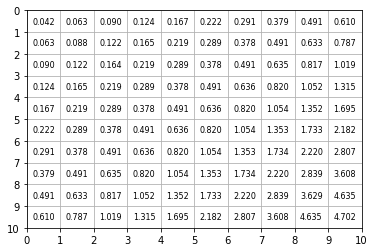

In [12]:
Vs1_2d = Vs1.reshape((height, width))
#print(tabulate(Vs1_2d.T,  tablefmt='fancy_grid'))
fig = plt.figure()
ax = plt.gca()
ax.invert_yaxis()
ax.set_xticks(np.arange(0, width + 1, 1))
ax.set_yticks(np.arange(0, height + 1, 1))
for j in range(width):
    for i in range(height):
        plt.text(i + 0.5, j + 0.5, '%.3f' %Vs1_2d[i][j], horizontalalignment = 'center', verticalalignment = 'center', fontsize = 8, color='black')
plt.grid()
plt.show()

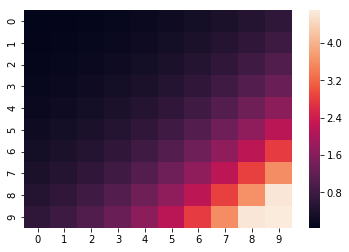

In [13]:
#problem3
hm3 = sns.heatmap(Vs1_2d.T)

In [14]:
#problem5
arrows = ['↑','→','↓','←']
def calOptimalAction(optimalAction, tp, Rfunc, Vs, discount):
    for s in range(height * width):
        actionValue = calStateValue(s, tp, Rfunc, Vs, discount)
        optimal = np.argmax(actionValue)
        optimalAction[s] = optimal
def action2Arrow(action, arrows):
    ll = [1, 0, 3, 2]
    return [ll[int(i)] for i in action]

In [15]:
optimalAction1 = np.zeros(height * width)
calOptimalAction(optimalAction1, tp, Rfunc1, Vs1, discount)

In [16]:
# optimalAction1_2d = optimalAction1.reshape((height, width))
# arrows1 = action2Arrow(optimalAction1, arrows)
# path1 = np.array(arrows1).reshape((height,width)).T
# print(tabulate(optimalAction1_2d.T,  tablefmt='fancy_grid'))

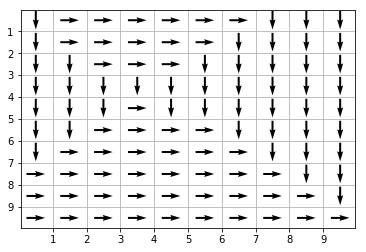

In [17]:
#optimalAction1_2d = optimalAction1.reshape((height, width))
arrows1 = action2Arrow(optimalAction1, arrows)
path1 = np.array(arrows1).reshape((height,width)).T
X = np.arange(0.5, height, 1)
Y = np.arange(0.5, width, 1)
U = np.cos(path1 * np.pi / 2)
V = np.sin(path1 * np.pi / 2)
plt.figure()
ax = plt.gca()
ax.invert_yaxis()
ax.set_xticks(np.arange(0, width + 1, 1))
ax.set_yticks(np.arange(0, height + 1, 1))
plt.quiver(X,Y,U,V,units='x',pivot='mid')
plt.grid()
plt.show()

# print(tabulate(path1))

In [18]:
#problem6
Vs2 = np.zeros(height * width)
# print(tp.shape)
# print(Rfunc2.shape)
calVs(Vs2, tp, Rfunc2, discount, theta)#calculate state value for each state

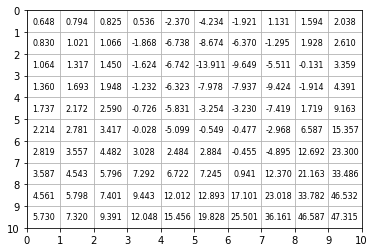

In [19]:
Vs2_2d = Vs2.reshape((height, width))
fig = plt.figure()
ax = plt.gca()
ax.invert_yaxis()
ax.set_xticks(np.arange(0, width + 1, 1))
ax.set_yticks(np.arange(0, height + 1, 1))
for j in range(width):
    for i in range(height):
        plt.text(i + 0.5, j + 0.5, '%.3f' %Vs2_2d[i][j], horizontalalignment = 'center', verticalalignment = 'center', fontsize = 8, color='black')
plt.grid()
plt.show()

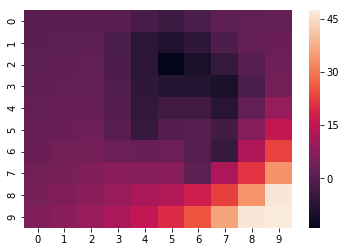

In [20]:
#problem7
hm4 = sns.heatmap(Vs2_2d.T)

In [21]:
#problem9
optimalAction2 = np.zeros(height * width)
calOptimalAction(optimalAction2, tp, Rfunc2, Vs2, discount)

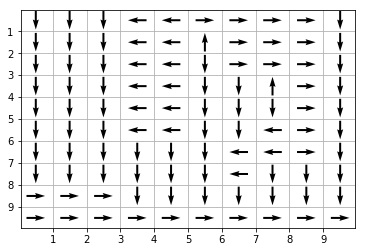

In [22]:
# optimalAction2_2d = optimalAction2.reshape((height, width))
# arrows2 = action2Arrow(optimalAction2, arrows)
# path2 = np.array(arrows2).reshape((height,width)).T
# print(tabulate(optimalAction2_2d.T,  tablefmt='fancy_grid'))
optimalAction2_2d = optimalAction2.reshape((height, width))
arrows2 = action2Arrow(optimalAction2, arrows)
path2 = np.array(arrows2).reshape((height,width)).T
X = np.arange(0.5, height, 1)
Y = np.arange(0.5, width, 1)
U = np.cos(path2 * np.pi / 2)
V = np.sin(path2 * np.pi / 2)
plt.figure()
ax = plt.gca()
ax.invert_yaxis()
ax.set_xticks(np.arange(0, width + 1, 1))
ax.set_yticks(np.arange(0, height + 1, 1))
plt.quiver(X,Y,U,V,units='x',pivot='mid')
plt.grid()
plt.show()

In [23]:
# print(tabulate(path2))

# IRL #

In [24]:
def tp2tpm(height, width, tp):
    tpm = np.zeros((height * width, 4, height * width))
    for s in range(tp.shape[0]):
        x = s // height
        y = s % height
        for action in range(tp.shape[2]):
            for i in range(tp.shape[1]):
                x1 = x + dx[i]
                y1 = y + dy[i]
                if not offGrid(x1, y1, height, width):
                    s1 = x1 * height + y1
                    tpm[s][action][s1] = tp[s][i][action]
    return tpm

In [25]:
def calculate_LP_D(a, s, policy, gamma, tp):
    # (Pa1 −Pa)(I−γPa1)−1
#     print(tp.shape)
    return np.dot(tp[int(policy[s]), s] - tp[a, s], np.linalg.inv(np.eye(100) - gamma*tp[int(policy[s])]))

In [ ]:
def calculate_accuracy(n_states, ground_truth, extracted_reward):
    extracted_reward = extracted_reward.reshape((height,width))
    Vs_0 = np.zeros(height * width)
    discount = 0.8
    theta = 0.01
    print(tp)
    calVs(Vs_0, tp, extracted_reward, discount, theta)
    optimalAction_0 = np.zeros(height * width)
    calOptimalAction(optimalAction_0, tp, extracted_reward, Vs_0, discount)
#     print(tp.shape)
    count = 0
    for i in range(n_states):
        if ground_truth[i] == optimalAction_0[i]:
            count += 1
    return float(count)/float(n_states)

In [27]:
#Question 11:
import numpy as np
import matplotlib.pyplot as plt
from cvxopt import solvers,matrix
lamda_list = np.linspace(0,5,50)
lamda_list = [0.1]
lamda_list = np.linspace(0,5,100)
A = {0,1,2,3}
n_actions = 4
n_states = 100
gamma = 0.8
tpm = tp2tpm(height, width, tp)
# print(tpm.shape)
transition_probability = np.transpose(tpm, (1, 0, 2))
Rmax1 = 0.0
for i in range(0,10):
    for j in range(0,10):
        Rmax1 = max(Rmax1, abs(Rfunc1[i,j]))    

In [28]:
def normalize(vals):
    min_val = np.min(vals)
    max_val = np.max(vals)
    return (vals - min_val) / (max_val - min_val)


In [29]:
def perform_IRL(optimalAction, transition_probability, Rmax, lamda_list):
#     accuracy = []
#     for lamda in lamda_list:
#         n_states = 100
#         policy = optimalAction
# #         C = -np.hstack([np.zeros((100,1)), np.ones((100,1)), -lamda*np.ones((100,1)), np.zeros((100,1))]) 
#         C = -np.hstack([np.zeros(n_states), np.ones(n_states),-lamda*np.ones(n_states), np.zeros(n_states)])
# #         c = np.zeros([100,1])
# #         c = np.row_stack([c, np.ones([100,1])])
# #         c = np.row_stack([c, -lamda * np.ones([100,1])])
# #         c = np.row_stack([c, np.zeros([100,1])])
# #         c = np.mat(c)
# #         print(c.shape)   
# #         print(A - {policy[1]})
#         T_stack = np.vstack([
#                 calculate_LP_D(a, s, policy, gamma, transition_probability)
#                 for s in range(n_states)
#                 for a in A - {policy[s]}
#             ])
#         one_stack = np.vstack([
#                 np.eye(1, n_states, k=s)
#                 for s in range(n_states)
#                 for a in A - {policy[s]}
#             ])
# #         one_stack = np.vstack((np.eye(100),np.eye(100),np.eye(100)))

#         # X = [R, T, U, M]
#         # (Pa1 −Pa)(I−γPa1)−1 * R >= T => -(Pa1 −Pa)(I−γPa1)−1 * R <= -T => -(Pa1 −Pa)(I−γPa1)−1 * R + T <= 0
#         D_0 = np.hstack([-T_stack, one_stack, np.zeros((300,100)),np.zeros((300,100))])
#         print(D_0.shape)
#         # (Pa1 −Pa)(I−γPa1)−1 * R >= 0 => -(Pa1 −Pa)(I−γPa1)−1 * R <= 0
#         D_1 = np.hstack([-T_stack, np.zeros((300,100)),np.zeros((300,100)),np.zeros((300,100))])
# #         print(D_1)
#         # R <= u and R >= -u => R-u<=0 and -R-u <=0
#         D_2 = np.hstack([np.eye(n_states),np.zeros((100,100)),-np.eye(n_states),np.zeros((100,100))])
#         D_3 = np.hstack([-np.eye(n_states),np.zeros((100,100)),-np.eye(n_states),np.zeros((100,100))])
#         # R <= Rmax and R >= -Rmax => R - Rmax <=0 and -R - Rmax <=0
#         D_4 = np.hstack([np.eye(n_states), np.zeros((100,100)), np.zeros((100,100)), -np.eye(n_states)])
#         D_5 = np.hstack([-np.eye(n_states), np.zeros((100,100)), np.zeros((100,100)), -np.eye(n_states)])

#         D = np.vstack([D_0, D_2, D_1, D_4, D_3, D_5])
#         np.save('D', D)
#         d = matrix(D)
#         B = np.zeros((1000,1))
#         b = matrix(B)
#         c = matrix(C)
#         results = solvers.lp(c, d, b)
#         r = np.asarray(results["x"][:n_states], dtype=np.double)
#         # print(r)
#         res = r.reshape((n_states,))
#         print(res)
# #         rewards = normalize(res)
#         temp_acc = calculate_accuracy(100, optimalAction, res)
#         print(temp_acc)
#         accuracy.append(temp_acc)

#     return {'accuracy':accuracy, 'reward': res}
    accuracy = []
    for lamda in lamda_list:
        n_states = 100
        policy = optimalAction
        C = -np.hstack([np.zeros(100), np.ones(100), -lamda*np.ones(100), np.zeros(100)]) 
#         print(C.shape)   
#         print(A - {policy[1]})
        T_stack = np.vstack([
                calculate_LP_D(a, s, policy, gamma, transition_probability)
                for s in range(n_states)
                for a in A - {policy[s]}
            ])
        one_stack = np.vstack([
                np.eye(1, n_states, s)
                for s in range(n_states)
                for a in A - {policy[s]}
            ])
        # X = [R, T, U, M]
        # (Pa1 −Pa)(I−γPa1)−1 * R >= T => -(Pa1 −Pa)(I−γPa1)−1 * R <= -T => -(Pa1 −Pa)(I−γPa1)−1 * R + T <= 0
        D_0 = np.hstack([-T_stack, one_stack,np.zeros((300,100)),np.zeros((300,100))])
        # (Pa1 −Pa)(I−γPa1)−1 * R >= 0 => -(Pa1 −Pa)(I−γPa1)−1 * R <= 0
        D_1 = np.hstack([-T_stack, np.zeros((300,100)),np.zeros((300,100)),np.zeros((300,100))])
        # R <= u and R >= -u => R-u<=0 and -R-u <=0
        D_2 = np.hstack([np.eye(n_states),np.zeros((100,100)),-np.eye(n_states),np.zeros((100,100))])
        D_3 = np.hstack([-np.eye(n_states),np.zeros((100,100)),-np.eye(n_states),np.zeros((100,100))])
        # R <= Rmax and R >= -Rmax => R - Rmax <=0 and -R - Rmax <=0
        D_4 = np.hstack([np.eye(n_states), np.zeros((100,100)), np.zeros((100,100)), -np.eye(n_states)])
        D_5 = np.hstack([-np.eye(n_states), np.zeros((100,100)), np.zeros((100,100)), -np.eye(n_states)])

        D = np.vstack([D_0, D_1, D_2, D_3, D_4, D_5])
        d = matrix(D)
        B = np.zeros((1000,1))
        b = matrix(B)
        c = matrix(C)
        results = solvers.lp(c, d, b)
        r = np.asarray(results["x"][:n_states], dtype=np.double)
        # print(r)
        res = r.reshape((n_states,))
#         print(res)
        temp_acc = calculate_accuracy(100, optimalAction, res)
        print(temp_acc)
        accuracy.append(temp_acc)
    return {'accuracy':accuracy, 'reward': res}

In [30]:
def perform_IRL_2(policy, transition_probability, Rmax, lamda_list):
    A = set(range(n_actions)) 
    def T(a, s):
#         print(transition_probability.shape)
        return np.dot(transition_probability[int(policy[s]), s] -
                      transition_probability[int(a), s],
                      np.linalg.inv(np.eye(n_states) -
                        discount*transition_probability[int(policy[s])]))
    accuracy = []
    for lamda in lamda_list:
        c = -np.hstack([np.zeros(n_states), np.ones(n_states),
                        -lamda*np.ones(n_states)])
        zero_stack1 = np.zeros((n_states*(n_actions-1), n_states))
        T_stack = np.vstack([
            -T(a, s)
            for s in range(n_states)
            for a in A - {policy[s]}
        ])
#         I_stack1 = np.vstack([
#             np.eye(1, n_states, s)
#             for s in range(n_states)
#             for a in A - {policy[s]}
#         ])
        I_stack1 = np.vstack((np.eye(100),np.eye(100),np.eye(100)))
        I_stack2 = np.eye(n_states)
        zero_stack2 = np.zeros((n_states, n_states))

        D_left = np.vstack([T_stack, T_stack, -I_stack2, I_stack2])
        D_middle = np.vstack([I_stack1, zero_stack1, zero_stack2, zero_stack2])
        D_right = np.vstack([zero_stack1, zero_stack1, -I_stack2, -I_stack2])

        D = np.hstack([D_left, D_middle, D_right])
        b = np.zeros((n_states*(n_actions-1)*2 + 2*n_states, 1))
        bounds = np.array([(None, None)]*2*n_states + [(-Rmax, Rmax)]*n_states)
#         print(bounds.shape)
        # We still need to bound R. To do this, we just add
        # -I R <= Rmax 1
        # I R <= Rmax 1
        # So to D we need to add -I and I, and to b we need to add Rmax 1 and Rmax 1
        D_bounds = np.hstack([
            np.vstack([
                -np.eye(n_states),
                np.eye(n_states)]),
            np.vstack([
                np.zeros((n_states, n_states)),
                np.zeros((n_states, n_states))]),
            np.vstack([
                np.zeros((n_states, n_states)),
                np.zeros((n_states, n_states))])])
        b_bounds = np.vstack([Rmax*np.ones((n_states, 1))]*2)
        print(b_bounds.shape)
        D = np.vstack((D, D_bounds))
        b = np.vstack((b, b_bounds))
        A_ub = matrix(D)
        b = matrix(b)
        c = matrix(c)
        results = solvers.lp(c, A_ub, b)
        r = np.asarray(results["x"][:n_states], dtype=np.double)
        res = r.reshape((n_states,))
#         res = res/1000
#         rewards = normalize(res)
        print(res)
        temp_acc = calculate_accuracy(100, policy, res)
        print(temp_acc)
        accuracy.append(temp_acc)
    return {'accuracy':accuracy, 'reward': res}

In [31]:
# print(transition_probability.shape)
# res = lp_irl(transition_probability, optimalAction2, lamda_list, Rmax2)
# print(res)

(200, 1)
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.8086e+04  3e+04  2e-02  2e+01  1e+00
 1:  2.6297e+01 -2.0327e+04  2e+04  2e-02  1e+01  2e+00
 2:  3.8770e+01 -1.6205e+04  2e+04  1e-02  1e+01  3e+00
 3: -3.7377e+01 -7.6095e+03  9e+03  6e-03  5e+00  3e+00
 4: -3.4342e+02 -3.8453e+03  5e+03  3e-03  3e+00  2e+00
 5: -1.6410e+03 -5.2378e+03  8e+03  3e-03  3e+00  4e+00
 6: -1.7888e+03 -5.4152e+03  9e+03  3e-03  3e+00  5e+00
 7: -2.4980e+03 -5.0791e+03  7e+03  2e-03  2e+00  4e+00
 8: -3.0709e+03 -4.7508e+03  6e+03  1e-03  1e+00  3e+00
 9: -3.4792e+03 -4.4765e+03  4e+03  8e-04  7e-01  2e+00
10: -3.7120e+03 -4.1981e+03  2e+03  4e-04  3e-01  2e+00
11: -3.9160e+03 -4.0901e+03  7e+02  1e-04  1e-01  7e-01
12: -3.9799e+03 -4.0760e+03  4e+02  8e-05  7e-02  4e-01
13: -4.0223e+03 -4.0707e+03  2e+02  4e-05  3e-02  2e-01
14: -4.0507e+03 -4.0660e+03  7e+01  1e-05  1e-02  6e-02
15: -4.0586e+03 -4.0653e+03  3e+01  5e-06  5e-03  3e-02
16: -4.0620e+03 -4.0647e+03  1e+01  2e-06

0.33
(200, 1)
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.8086e+04  3e+04  2e-02  2e+01  1e+00
 1:  4.3611e+01 -1.9731e+04  2e+04  2e-02  1e+01  2e+00
 2:  8.6764e+01 -1.5587e+04  2e+04  1e-02  1e+01  3e+00
 3:  5.4980e+01 -7.5068e+03  9e+03  6e-03  5e+00  3e+00
 4: -1.5733e+02 -3.2177e+03  4e+03  2e-03  2e+00  2e+00
 5: -9.8639e+02 -4.0001e+03  6e+03  2e-03  2e+00  3e+00
 6: -1.4577e+03 -4.1598e+03  6e+03  2e-03  2e+00  3e+00
 7: -1.8315e+03 -4.0682e+03  6e+03  2e-03  2e+00  4e+00
 8: -2.1524e+03 -3.7107e+03  5e+03  1e-03  1e+00  3e+00
 9: -2.5992e+03 -3.4570e+03  3e+03  7e-04  6e-01  2e+00
10: -2.7511e+03 -3.2421e+03  2e+03  4e-04  3e-01  2e+00
11: -3.0025e+03 -3.1950e+03  7e+02  2e-04  1e-01  6e-01
12: -3.1200e+03 -3.1702e+03  2e+02  4e-05  4e-02  2e-01
13: -3.1539e+03 -3.1679e+03  5e+01  1e-05  1e-02  5e-02
14: -3.1609e+03 -3.1677e+03  2e+01  5e-06  5e-03  2e-02
15: -3.1664e+03 -3.1675e+03  4e+00  9e-07  8e-04  4e-03
16: -3.1674e+03 -3.1676e+03  8e-01  

0.32
(200, 1)
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.8086e+04  3e+04  2e-02  2e+01  1e+00
 1:  5.7795e+01 -1.9113e+04  2e+04  2e-02  1e+01  2e+00
 2:  1.2328e+02 -1.5083e+04  2e+04  1e-02  1e+01  3e+00
 3:  1.1996e+02 -7.2630e+03  9e+03  6e-03  5e+00  3e+00
 4: -4.5409e+01 -2.6375e+03  3e+03  2e-03  2e+00  1e+00
 5: -4.9227e+02 -3.1059e+03  5e+03  2e-03  2e+00  2e+00
 6: -1.0051e+03 -3.2076e+03  5e+03  2e-03  2e+00  2e+00
 7: -1.1182e+03 -3.2053e+03  5e+03  2e-03  1e+00  3e+00
 8: -1.3665e+03 -2.9848e+03  4e+03  1e-03  1e+00  3e+00
 9: -1.5811e+03 -2.7303e+03  3e+03  9e-04  8e-01  2e+00
10: -1.9705e+03 -2.5214e+03  2e+03  4e-04  4e-01  1e+00
11: -2.0419e+03 -2.4224e+03  1e+03  3e-04  3e-01  1e+00
12: -2.2144e+03 -2.3769e+03  5e+02  1e-04  1e-01  5e-01
13: -2.2956e+03 -2.3598e+03  2e+02  5e-05  4e-02  2e-01
14: -2.3325e+03 -2.3519e+03  6e+01  2e-05  1e-02  6e-02
15: -2.3463e+03 -2.3515e+03  2e+01  4e-06  4e-03  2e-02
16: -2.3502e+03 -2.3513e+03  4e+00  

0.3
(200, 1)
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.8086e+04  3e+04  2e-02  2e+01  1e+00
 1:  6.9464e+01 -1.8474e+04  2e+04  1e-02  1e+01  2e+00
 2:  1.5256e+02 -1.4685e+04  2e+04  1e-02  1e+01  3e+00
 3:  1.6732e+02 -6.8778e+03  8e+03  6e-03  5e+00  2e+00
 4:  2.9337e+01 -2.2478e+03  3e+03  2e-03  1e+00  1e+00
 5: -2.0928e+02 -2.2905e+03  3e+03  2e-03  1e+00  2e+00
 6: -6.3397e+02 -2.4709e+03  4e+03  1e-03  1e+00  2e+00
 7: -6.3242e+02 -2.4146e+03  4e+03  1e-03  1e+00  2e+00
 8: -8.2787e+02 -2.1972e+03  3e+03  1e-03  9e-01  2e+00
 9: -1.0654e+03 -2.0073e+03  3e+03  8e-04  6e-01  2e+00
10: -1.2494e+03 -1.8272e+03  2e+03  5e-04  4e-01  1e+00
11: -1.3800e+03 -1.7104e+03  1e+03  3e-04  2e-01  8e-01
12: -1.5206e+03 -1.6395e+03  4e+02  9e-05  8e-02  3e-01
13: -1.5814e+03 -1.6202e+03  1e+02  3e-05  3e-02  1e-01
14: -1.6012e+03 -1.6141e+03  4e+01  1e-05  8e-03  4e-02
15: -1.6083e+03 -1.6127e+03  1e+01  4e-06  3e-03  1e-02
16: -1.6105e+03 -1.6125e+03  6e+00  2

0.34
(200, 1)
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.8086e+04  3e+04  2e-02  2e+01  1e+00
 1:  7.9066e+01 -1.7819e+04  2e+04  1e-02  1e+01  2e+00
 2:  1.7688e+02 -1.4382e+04  2e+04  1e-02  9e+00  3e+00
 3:  2.0326e+02 -6.4045e+03  8e+03  5e-03  4e+00  2e+00
 4:  7.9382e+01 -1.9291e+03  2e+03  2e-03  1e+00  1e+00
 5: -2.3488e+01 -1.6111e+03  2e+03  1e-03  1e+00  1e+00
 6: -3.5292e+02 -1.6501e+03  3e+03  1e-03  8e-01  2e+00
 7: -3.2922e+02 -1.5831e+03  3e+03  1e-03  8e-01  2e+00
 8: -4.4842e+02 -1.4620e+03  2e+03  8e-04  6e-01  2e+00
 9: -6.2376e+02 -1.2821e+03  2e+03  5e-04  4e-01  1e+00
10: -7.1629e+02 -1.1681e+03  1e+03  4e-04  3e-01  9e-01
11: -8.7139e+02 -1.0463e+03  5e+02  1e-04  1e-01  4e-01
12: -8.9928e+02 -1.0270e+03  4e+02  1e-04  8e-02  3e-01
13: -9.5251e+02 -1.0095e+03  2e+02  5e-05  4e-02  1e-01
14: -9.7603e+02 -9.9893e+02  7e+01  2e-05  1e-02  6e-02
15: -9.8911e+02 -9.9713e+02  2e+01  6e-06  5e-03  2e-02
16: -9.9253e+02 -9.9672e+02  1e+01  

0.33
(200, 1)
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.8086e+04  3e+04  2e-02  2e+01  1e+00
 1:  8.6936e+01 -1.7152e+04  2e+04  1e-02  1e+01  2e+00
 2:  1.9598e+02 -1.4052e+04  2e+04  1e-02  8e+00  2e+00
 3:  2.3235e+02 -5.9213e+03  7e+03  5e-03  4e+00  2e+00
 4:  1.1120e+02 -1.6206e+03  2e+03  1e-03  1e+00  9e-01
 5:  6.2989e+01 -1.0801e+03  1e+03  9e-04  7e-01  8e-01
 6: -5.9194e+01 -7.9608e+02  1e+03  6e-04  4e-01  9e-01
 7: -1.8071e+02 -8.0685e+02  1e+03  5e-04  4e-01  9e-01
 8: -1.8595e+02 -7.4702e+02  1e+03  4e-04  3e-01  9e-01
 9: -2.4408e+02 -6.7095e+02  1e+03  3e-04  2e-01  8e-01
10: -3.3071e+02 -5.8772e+02  6e+02  2e-04  1e-01  5e-01
11: -3.9233e+02 -5.2152e+02  3e+02  1e-04  7e-02  3e-01
12: -4.4380e+02 -4.9760e+02  1e+02  4e-05  3e-02  1e-01
13: -4.6537e+02 -4.8916e+02  6e+01  2e-05  1e-02  6e-02
14: -4.7705e+02 -4.8456e+02  2e+01  6e-06  4e-03  2e-02
15: -4.8055e+02 -4.8359e+02  8e+00  2e-06  2e-03  8e-03
16: -4.8234e+02 -4.8310e+02  2e+00  

0.3
(200, 1)
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.8086e+04  3e+04  2e-02  1e+01  1e+00
 1:  9.3340e+01 -1.6475e+04  2e+04  1e-02  9e+00  1e+00
 2:  2.1067e+02 -1.3698e+04  2e+04  1e-02  7e+00  2e+00
 3:  2.7455e+02 -5.8616e+03  7e+03  5e-03  3e+00  2e+00
 4:  1.3259e+02 -1.3515e+03  2e+03  1e-03  8e-01  7e-01
 5:  9.2784e+01 -6.4361e+02  9e+02  6e-04  4e-01  5e-01
 6:  6.1813e+01 -2.5618e+02  4e+02  3e-04  2e-01  4e-01
 7:  7.2135e+00 -1.3180e+02  2e+02  1e-04  7e-02  2e-01
 8: -1.8723e+01 -1.4021e+02  2e+02  1e-04  6e-02  2e-01
 9: -1.9406e+01 -1.2529e+02  2e+02  8e-05  6e-02  2e-01
10: -4.8476e+01 -1.0798e+02  1e+02  5e-05  3e-02  1e-01
11: -6.8029e+01 -9.4982e+01  6e+01  2e-05  1e-02  5e-02
12: -6.8551e+01 -9.4074e+01  5e+01  2e-05  1e-02  5e-02
13: -7.9898e+01 -8.6812e+01  1e+01  6e-06  4e-03  1e-02
14: -8.2579e+01 -8.4956e+01  5e+00  2e-06  1e-03  5e-03
15: -8.3683e+01 -8.4337e+01  1e+00  5e-07  3e-04  1e-03
16: -8.3975e+01 -8.4176e+01  4e-01  2

10:  1.4756e-07 -1.6188e-07  3e-07  2e-13  1e-10  2e-10
11:  1.4756e-09 -1.6188e-09  3e-09  2e-15  3e-12  2e-12
Optimal solution found.
[ 2.10408808e-13 -1.55591783e-12 -3.12349322e-12  1.42682737e-12
  6.05694610e-12 -2.35968085e-13  1.25769623e-11  6.93562207e-11
 -5.17508220e-11  1.07125336e-10 -4.34254211e-11  1.09907727e-13
  7.37203158e-13  4.28980629e-12  1.04524481e-11  1.41366823e-11
  1.81750439e-11  2.42318323e-12  3.43808040e-12  1.23951861e-10
 -2.01339332e-11 -9.96610423e-12 -1.24470733e-12  2.21546681e-13
  9.25953994e-13  1.32917303e-11  2.95657285e-12  6.34163202e-11
  2.89256364e-10  5.14694062e-13 -1.48559263e-10 -1.92304006e-10
 -9.27854409e-11 -6.46428997e-11 -2.56381024e-11 -6.13773780e-12
 -6.04990666e-11 -1.32077960e-10  2.99511559e-10  9.87264424e-11
 -1.10636948e-10 -5.65887473e-11 -1.27689391e-10 -8.22471127e-11
 -1.63201385e-10 -7.51830224e-11 -2.27190844e-11  1.31636658e-10
 -5.37234092e-11  1.47723254e-10 -1.50164217e-12 -1.13360340e-10
 -6.59519874e-11 -1

(200, 1)
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.8086e+04  3e+04  2e-02  1e+01  1e+00
 1:  1.1052e+02 -1.6145e+04  2e+04  1e-02  7e+00  1e+00
 2:  2.5577e+02 -1.3659e+04  2e+04  1e-02  6e+00  2e+00
 3:  3.7455e+02 -7.1054e+03  9e+03  6e-03  3e+00  2e+00
 4:  1.6999e+02 -7.5540e+02  1e+03  7e-04  4e-01  4e-01
 5:  4.4562e+01 -7.9811e+01  1e+02  1e-04  5e-02  7e-02
 6:  1.2419e+00 -1.1808e+00  2e+00  2e-06  1e-03  1e-03
 7:  1.2410e-02 -1.1797e-02  2e-02  2e-08  1e-05  1e-05
 8:  1.2409e-04 -1.1797e-04  2e-04  2e-10  1e-07  1e-07
 9:  1.2409e-06 -1.1797e-06  2e-06  2e-12  1e-09  1e-09
10:  1.2409e-08 -1.1797e-08  2e-08  2e-14  1e-11  1e-11
Optimal solution found.
[-1.83677499e-12 -6.11648555e-12 -1.14150959e-11  7.21499803e-12
  3.78893761e-11  8.49118781e-12  4.88873217e-11  2.82191730e-10
 -2.37781635e-10  4.42431968e-10 -1.43859247e-10 -2.22927111e-12
  2.11210773e-14  1.99854725e-11  3.68367159e-11  7.60340749e-11
  7.02764199e-11  1.70421584e-11  2.7

 6:  4.1118e-01 -4.7406e-01  9e-01  7e-07  3e-04  5e-04
 7:  4.1108e-03 -4.7395e-03  9e-03  7e-09  3e-06  5e-06
 8:  4.1108e-05 -4.7394e-05  9e-05  7e-11  3e-08  5e-08
 9:  4.1108e-07 -4.7394e-07  9e-07  7e-13  4e-10  5e-10
10:  4.1108e-09 -4.7394e-09  9e-09  7e-15  4e-12  5e-12
Optimal solution found.
[-1.22662199e-12 -1.63186442e-12 -2.32465398e-12  2.29067098e-12
  1.11355536e-11  7.60969170e-12  9.67585358e-12  5.93027573e-11
 -4.67828704e-11  9.23370624e-11 -2.62639197e-11 -1.55835797e-12
 -4.24245058e-13  4.52136489e-12  8.04745096e-12  1.73356096e-11
  1.47803570e-11  8.75816089e-12  6.24711821e-12  1.00053194e-10
 -1.74636588e-11 -5.62677714e-12  1.29028077e-13  2.75948137e-12
  3.87650009e-12  1.82839140e-11  1.75793036e-12  5.85333560e-11
  2.37770291e-10  5.01522202e-13 -8.59928659e-11 -1.25157313e-10
 -6.98290338e-11 -5.32958367e-11 -3.61238962e-11 -1.33030120e-11
 -2.28536544e-11 -1.09920268e-10  2.37402231e-10  8.45346684e-11
 -9.54913201e-11 -5.12365055e-11 -8.15110770e-

(200, 1)
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.8086e+04  3e+04  2e-02  1e+01  1e+00
 1:  1.2500e+02 -1.6062e+04  2e+04  1e-02  6e+00  1e+00
 2:  2.9500e+02 -1.3758e+04  2e+04  1e-02  5e+00  2e+00
 3:  4.5570e+02 -7.8251e+03  9e+03  7e-03  3e+00  3e+00
 4:  2.0107e+02 -6.4209e+02  9e+02  7e-04  3e-01  3e-01
 5:  2.6940e+01 -3.5785e+01  6e+01  5e-05  2e-02  3e-02
 6:  2.9952e-01 -3.5471e-01  7e-01  5e-07  2e-04  3e-04
 7:  2.9948e-03 -3.5466e-03  7e-03  5e-09  2e-06  3e-06
 8:  2.9948e-05 -3.5466e-05  7e-05  5e-11  2e-08  3e-08
 9:  2.9948e-07 -3.5466e-07  7e-07  5e-13  2e-10  3e-10
10:  2.9948e-09 -3.5466e-09  7e-09  5e-15  3e-12  3e-12
Optimal solution found.
[-1.10354624e-12 -8.93015538e-13 -1.07945573e-12  1.37555492e-12
  6.69642055e-12  6.10673748e-12  5.02809278e-12  3.20025351e-11
 -2.56662114e-11  5.00561617e-11 -1.31113977e-11 -1.16474281e-12
 -2.89032371e-13  2.43010074e-12  4.40820989e-12  9.21456203e-12
  8.02085209e-12  6.08162807e-12  2.6

0.35
(200, 1)
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.8086e+04  3e+04  2e-02  9e+00  1e+00
 1:  1.3125e+02 -1.5995e+04  2e+04  1e-02  5e+00  1e+00
 2:  3.1170e+02 -1.3785e+04  2e+04  1e-02  5e+00  2e+00
 3:  4.9062e+02 -8.0319e+03  1e+04  7e-03  3e+00  3e+00
 4:  2.1496e+02 -7.3187e+02  1e+03  8e-04  3e-01  3e-01
 5:  2.6002e+01 -3.1291e+01  6e+01  5e-05  2e-02  3e-02
 6:  2.7319e-01 -3.1030e-01  6e-01  5e-07  2e-04  3e-04
 7:  2.7317e-03 -3.1026e-03  6e-03  5e-09  2e-06  3e-06
 8:  2.7317e-05 -3.1026e-05  6e-05  5e-11  2e-08  3e-08
 9:  2.7317e-07 -3.1026e-07  6e-07  5e-13  2e-10  3e-10
10:  2.7317e-09 -3.1026e-09  6e-09  5e-15  2e-12  3e-12
Optimal solution found.
[-1.08792754e-12 -5.97787266e-13 -5.95718564e-13  1.06854160e-12
  5.11394581e-12  5.35035937e-12  3.55495997e-12  2.33763728e-11
 -1.97075974e-11  3.68611723e-11 -9.01810574e-12 -9.35548678e-13
 -1.89503452e-13  1.70613177e-12  3.20395303e-12  6.54531630e-12
  5.82947168e-12  4.85985222e-12

 7:  2.4758e-03 -2.5921e-03  5e-03  4e-09  2e-06  3e-06
 8:  2.4758e-05 -2.5921e-05  5e-05  4e-11  2e-08  3e-08
 9:  2.4758e-07 -2.5921e-07  5e-07  4e-13  2e-10  3e-10
10:  2.4758e-09 -2.5921e-09  5e-09  4e-15  2e-12  3e-12
Optimal solution found.
[-9.63879690e-13 -4.08984913e-13 -2.96166903e-13  8.72493003e-13
  3.97304885e-12  4.53370725e-12  2.65479406e-12  1.76324974e-11
 -1.57011790e-11  2.80523147e-11 -6.42748947e-12 -7.31163228e-13
 -1.05230306e-13  1.24261930e-12  2.41533630e-12  4.82547306e-12
  4.39141765e-12  3.79930269e-12  1.06061707e-12  2.95692736e-11
 -4.15821520e-12 -7.76571533e-13  4.44965585e-13  1.29552678e-12
  2.20394157e-12  5.18342533e-12  5.76921731e-13  1.83413400e-11
  7.27864898e-11 -1.00598279e-12 -1.69790924e-11 -2.78090253e-11
 -1.77161293e-11 -1.49531270e-11 -1.21645461e-11 -5.06405630e-12
 -3.97281267e-12 -3.69752218e-11  7.13523043e-11  2.63374421e-11
 -2.92130688e-11 -1.55150682e-11 -1.92377941e-11 -1.97325221e-11
 -3.02039935e-11 -1.88615748e-11 -2.5

 1:  1.4232e+02 -1.5826e+04  2e+04  1e-02  5e+00  1e+00
 2:  3.4035e+02 -1.3806e+04  2e+04  1e-02  4e+00  2e+00
 3:  5.5243e+02 -8.2475e+03  1e+04  7e-03  2e+00  3e+00
 4:  2.3163e+02 -8.2894e+02  1e+03  8e-04  3e-01  3e-01
 5:  2.0942e+01 -1.6377e+01  4e+01  3e-05  1e-02  2e-02
 6:  2.1021e-01 -1.6373e-01  4e-01  3e-07  1e-04  2e-04
 7:  2.1020e-03 -1.6372e-03  4e-03  3e-09  1e-06  2e-06
 8:  2.1020e-05 -1.6372e-05  4e-05  3e-11  1e-08  2e-08
 9:  2.1020e-07 -1.6372e-07  4e-07  3e-13  1e-10  2e-10
10:  2.1020e-09 -1.6372e-09  4e-09  3e-15  2e-12  2e-12
Optimal solution found.
[-7.40476709e-13 -2.44420645e-13 -1.06661475e-13  6.51934557e-13
  2.94009473e-12  3.56088653e-12  1.90343717e-12  1.29327787e-11
 -1.24060211e-11  2.08163429e-11 -4.35543644e-12 -4.99423259e-13
 -3.94641297e-14  8.52461452e-13  1.72941818e-12  3.44150306e-12
  3.14958192e-12  2.69093277e-12  7.68957032e-13  2.16973195e-11
 -2.70683341e-12 -4.46049183e-13  3.68117868e-13  9.68154102e-13
  1.70628383e-12  3.635063

(200, 1)
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.8086e+04  3e+04  2e-02  7e+00  1e+00
 1:  1.4726e+02 -1.5727e+04  2e+04  1e-02  4e+00  1e+00
 2:  3.5260e+02 -1.3802e+04  2e+04  1e-02  4e+00  2e+00
 3:  5.8012e+02 -8.2818e+03  1e+04  7e-03  2e+00  3e+00
 4:  2.3573e+02 -8.4455e+02  1e+03  9e-04  3e-01  3e-01
 5:  1.8374e+01 -1.1617e+01  3e+01  2e-05  8e-03  2e-02
 6:  1.8373e-01 -1.1612e-01  3e-01  2e-07  8e-05  2e-04
 7:  1.8372e-03 -1.1611e-03  3e-03  2e-09  8e-07  2e-06
 8:  1.8372e-05 -1.1611e-05  3e-05  2e-11  8e-09  2e-08
 9:  1.8372e-07 -1.1611e-07  3e-07  2e-13  8e-11  2e-10
10:  1.8372e-09 -1.1611e-09  3e-09  3e-15  2e-12  2e-12
Optimal solution found.
[-5.64948569e-13 -1.60660762e-13 -1.31822636e-14  5.31214080e-13
  2.27195329e-12  2.87985595e-12  1.47139738e-12  9.84186095e-12
 -1.00063644e-11  1.60069986e-11 -3.07893286e-12 -3.66675132e-13
 -7.29073300e-15  6.25884725e-13  1.31108196e-12  2.57473109e-12
  2.38053160e-12  1.98188840e-12  7.0

(200, 1)
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.8086e+04  3e+04  2e-02  7e+00  1e+00
 1:  1.5189e+02 -1.5621e+04  2e+04  1e-02  4e+00  1e+00
 2:  3.6365e+02 -1.3791e+04  2e+04  1e-02  3e+00  2e+00
 3:  6.0603e+02 -8.2785e+03  1e+04  7e-03  2e+00  3e+00
 4:  2.3768e+02 -8.4305e+02  1e+03  9e-04  3e-01  3e-01
 5:  1.6558e+01 -1.0968e+01  3e+01  2e-05  7e-03  2e-02
 6:  1.6549e-01 -1.0961e-01  3e-01  2e-07  7e-05  2e-04
 7:  1.6548e-03 -1.0961e-03  3e-03  2e-09  7e-07  2e-06
 8:  1.6548e-05 -1.0961e-05  3e-05  2e-11  7e-09  2e-08
 9:  1.6548e-07 -1.0961e-07  3e-07  2e-13  7e-11  2e-10
10:  1.6548e-09 -1.0961e-09  3e-09  2e-15  2e-12  2e-12
Optimal solution found.
[-4.38764112e-13 -1.23398572e-13  2.70647874e-14  4.66002514e-13
  1.83345289e-12  2.40473491e-12  1.22099203e-12  7.75776838e-12
 -8.16758981e-12  1.27105699e-11 -2.29732184e-12 -2.98392563e-13
  6.35311167e-15  4.96006768e-13  1.05697925e-12  2.02471658e-12
  1.89967347e-12  1.55791339e-12  6.8

(200, 1)
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.8086e+04  3e+04  2e-02  7e+00  1e+00
 1:  1.5623e+02 -1.5508e+04  2e+04  1e-02  4e+00  1e+00
 2:  3.7359e+02 -1.3773e+04  2e+04  1e-02  3e+00  2e+00
 3:  6.3036e+02 -8.2437e+03  1e+04  7e-03  2e+00  3e+00
 4:  2.3787e+02 -8.2739e+02  1e+03  8e-04  2e-01  3e-01
 5:  1.5887e+01 -1.0105e+01  3e+01  2e-05  6e-03  2e-02
 6:  1.5874e-01 -1.0097e-01  3e-01  2e-07  6e-05  2e-04
 7:  1.5873e-03 -1.0097e-03  3e-03  2e-09  6e-07  2e-06
 8:  1.5873e-05 -1.0097e-05  3e-05  2e-11  6e-09  2e-08
 9:  1.5873e-07 -1.0097e-07  3e-07  2e-13  6e-11  2e-10
10:  1.5873e-09 -1.0097e-09  3e-09  2e-15  1e-12  2e-12
Optimal solution found.
[-3.71008680e-13 -1.29037228e-13  3.11023253e-14  4.33151785e-13
  1.56124511e-12  2.09919267e-12  1.09121992e-12  6.42773048e-12
 -6.78440516e-12  1.05726070e-11 -1.89162288e-12 -2.81864007e-13
 -1.49141725e-15  4.23984897e-13  9.15865269e-13  1.68871215e-12
  1.64190957e-12  1.33921137e-12  7.3

(200, 1)
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.8086e+04  3e+04  2e-02  6e+00  1e+00
 1:  1.6019e+02 -1.5402e+04  2e+04  1e-02  3e+00  1e+00
 2:  3.8266e+02 -1.3751e+04  2e+04  1e-02  3e+00  2e+00
 3:  6.5351e+02 -8.1863e+03  1e+04  7e-03  2e+00  3e+00
 4:  2.4254e+02 -8.1980e+02  1e+03  8e-04  2e-01  3e-01
 5:  1.5520e+01 -9.5690e+00  3e+01  2e-05  5e-03  2e-02
 6:  1.5503e-01 -9.5599e-02  3e-01  2e-07  5e-05  2e-04
 7:  1.5503e-03 -9.5597e-04  3e-03  2e-09  5e-07  2e-06
 8:  1.5503e-05 -9.5597e-06  3e-05  2e-11  5e-09  2e-08
 9:  1.5503e-07 -9.5597e-08  3e-07  2e-13  5e-11  2e-10
10:  1.5503e-09 -9.5597e-10  3e-09  2e-15  1e-12  2e-12
Optimal solution found.
[-3.23171694e-13 -1.32810554e-13  2.99788547e-14  4.02213373e-13
  1.36124221e-12  1.86707292e-12  9.93608317e-13  5.50225521e-12
 -5.82900662e-12  9.08431659e-12 -1.61873192e-12 -2.69374704e-13
 -7.18945651e-15  3.72716209e-13  8.13823114e-13  1.45521988e-12
  1.45447522e-12  1.18643938e-12  7.1

0.36
(200, 1)
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.8086e+04  3e+04  2e-02  6e+00  1e+00
 1:  1.6282e+02 -1.5377e+04  2e+04  1e-02  3e+00  1e+00
 2:  3.9191e+02 -1.3741e+04  2e+04  1e-02  3e+00  2e+00
 3:  6.6829e+02 -8.3149e+03  1e+04  7e-03  2e+00  3e+00
 4:  2.5128e+02 -8.5215e+02  1e+03  9e-04  2e-01  3e-01
 5:  1.5499e+01 -9.7838e+00  3e+01  2e-05  5e-03  2e-02
 6:  1.5482e-01 -9.7740e-02  3e-01  2e-07  5e-05  2e-04
 7:  1.5482e-03 -9.7738e-04  3e-03  2e-09  5e-07  2e-06
 8:  1.5482e-05 -9.7737e-06  3e-05  2e-11  5e-09  2e-08
 9:  1.5482e-07 -9.7737e-08  3e-07  2e-13  5e-11  2e-10
10:  1.5482e-09 -9.7737e-10  3e-09  2e-15  2e-12  2e-12
Optimal solution found.
[-2.84917918e-13 -1.25604268e-13  3.47933189e-14  3.79313089e-13
  1.22959331e-12  1.71730526e-12  9.27521012e-13  4.93073137e-12
 -5.32337473e-12  8.17897478e-12 -1.41934457e-12 -2.52504807e-13
 -4.94417423e-15  3.38300033e-13  7.44597953e-13  1.30797709e-12
  1.32222249e-12  1.07589445e-12

 5:  1.5447e+01 -1.0150e+01  3e+01  2e-05  5e-03  2e-02
 6:  1.5430e-01 -1.0140e-01  3e-01  2e-07  5e-05  2e-04
 7:  1.5430e-03 -1.0139e-03  3e-03  2e-09  5e-07  2e-06
 8:  1.5430e-05 -1.0139e-05  3e-05  2e-11  5e-09  2e-08
 9:  1.5430e-07 -1.0139e-07  3e-07  2e-13  5e-11  2e-10
10:  1.5430e-09 -1.0139e-09  3e-09  2e-15  2e-12  2e-12
Optimal solution found.
[-2.49655944e-13 -1.15301285e-13  3.89239278e-14  3.56167925e-13
  1.11580437e-12  1.58271175e-12  8.65733414e-13  4.45653617e-12
 -4.92545327e-12  7.42862690e-12 -1.24886749e-12 -2.33594387e-13
 -1.63279230e-15  3.08477467e-13  6.83042035e-13  1.18468097e-12
  1.20381176e-12  9.75539130e-13  5.64913829e-13  7.42212625e-12
 -6.02472433e-13 -1.23720265e-13  1.52968782e-13  3.92773824e-13
  7.65386058e-13  1.19012027e-12  2.28540089e-13  4.63551150e-12
  1.85173728e-11 -1.45963471e-13 -2.18977776e-12 -3.96346127e-12
 -3.33733816e-12 -3.22416609e-12 -2.92143899e-12 -1.41840427e-12
 -7.76212941e-13 -1.01195971e-11  1.87960536e-11  6.912

  4.31082592e-12  4.59708084e-13  1.21695863e-11  1.22788733e-11]
0.36
(200, 1)
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.8086e+04  3e+04  2e-02  5e+00  1e+00
 1:  1.6785e+02 -1.5316e+04  2e+04  1e-02  3e+00  1e+00
 2:  4.1065e+02 -1.3708e+04  2e+04  1e-02  3e+00  2e+00
 3:  6.9906e+02 -8.4770e+03  1e+04  7e-03  2e+00  3e+00
 4:  2.6873e+02 -9.2281e+02  1e+03  9e-04  2e-01  4e-01
 5:  1.4928e+01 -1.0347e+01  3e+01  2e-05  5e-03  2e-02
 6:  1.4912e-01 -1.0336e-01  3e-01  2e-07  5e-05  2e-04
 7:  1.4911e-03 -1.0336e-03  3e-03  2e-09  5e-07  2e-06
 8:  1.4911e-05 -1.0336e-05  3e-05  2e-11  5e-09  2e-08
 9:  1.4911e-07 -1.0336e-07  3e-07  2e-13  5e-11  2e-10
10:  1.4911e-09 -1.0336e-09  3e-09  2e-15  1e-12  2e-12
Optimal solution found.
[-2.06022435e-13 -1.00788484e-13  3.94859306e-14  3.18767424e-13
  9.64633600e-13  1.39032588e-12  7.72449264e-13  3.84200618e-12
 -4.36845459e-12  6.44102694e-12 -1.04542220e-12 -2.05944498e-13
  8.02900577e-16  2.68197188e-1

(200, 1)
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.8086e+04  3e+04  2e-02  5e+00  1e+00
 1:  1.7018e+02 -1.5280e+04  2e+04  1e-02  3e+00  1e+00
 2:  4.0284e+02 -1.3793e+04  2e+04  1e-02  2e+00  2e+00
 3:  6.8913e+02 -8.3734e+03  1e+04  7e-03  2e+00  3e+00
 4:  2.7174e+02 -9.7378e+02  1e+03  1e-03  2e-01  4e-01
 5:  1.4145e+01 -1.0901e+01  3e+01  2e-05  4e-03  1e-02
 6:  1.4132e-01 -1.0891e-01  3e-01  2e-07  4e-05  1e-04
 7:  1.4131e-03 -1.0891e-03  3e-03  2e-09  4e-07  1e-06
 8:  1.4131e-05 -1.0891e-05  3e-05  2e-11  4e-09  1e-08
 9:  1.4131e-07 -1.0891e-07  3e-07  2e-13  4e-11  1e-10
10:  1.4131e-09 -1.0891e-09  3e-09  2e-15  9e-13  1e-12
Optimal solution found.
[-1.64872917e-13 -8.14554773e-14  4.24996856e-14  2.81894499e-13
  8.24344304e-13  1.20631494e-12  6.79218656e-13  3.28884577e-12
 -3.88152873e-12  5.54626344e-12 -8.56436597e-13 -1.74612166e-13
  6.19900587e-15  2.31915029e-13  5.17100471e-13  8.77794614e-13
  8.91070127e-13  7.11158326e-13  3.4

 6:  1.3027e-01 -1.0886e-01  2e-01  2e-07  4e-05  1e-04
 7:  1.3026e-03 -1.0886e-03  2e-03  2e-09  4e-07  1e-06
 8:  1.3026e-05 -1.0886e-05  2e-05  2e-11  4e-09  1e-08
 9:  1.3026e-07 -1.0886e-07  2e-07  2e-13  4e-11  1e-10
10:  1.3026e-09 -1.0886e-09  2e-09  2e-15  1e-12  1e-12
Optimal solution found.
[-1.33611908e-13 -6.74763477e-14  4.03366055e-14  2.45510895e-13
  7.00766701e-13  1.03568965e-12  5.89658948e-13  2.79941576e-12
 -3.39012884e-12  4.74001628e-12 -7.10462283e-13 -1.48656176e-13
  7.73033696e-15  1.99110036e-13  4.44030421e-13  7.48218852e-13
  7.57599294e-13  6.01457171e-13  2.64932455e-13  4.68591797e-12
 -3.21669952e-13 -6.82480464e-14  9.77252876e-14  2.61263852e-13
  5.06585396e-13  7.38396362e-13  1.78432517e-13  2.87819297e-12
  1.19094894e-11 -2.20335549e-13 -1.16900640e-12 -2.07588158e-12
 -1.89245033e-12 -1.91344064e-12 -1.77442513e-12 -9.04029377e-13
 -4.79595544e-13 -6.53479412e-12  1.18487231e-11  4.38779381e-12
 -5.28619765e-12 -2.63723571e-12 -2.63859657e-

 8:  1.1722e-05 -1.0581e-05  2e-05  2e-11  4e-09  1e-08
 9:  1.1722e-07 -1.0581e-07  2e-07  2e-13  4e-11  1e-10
10:  1.1722e-09 -1.0581e-09  2e-09  2e-15  7e-13  1e-12
Optimal solution found.
[-1.06356288e-13 -5.53850877e-14  3.59722631e-14  2.08427126e-13
  5.82604809e-13  8.68173900e-13  4.99535580e-13  2.33043778e-12
 -2.88549793e-12  3.95915863e-12 -5.80710400e-13 -1.24396505e-13
  7.69142624e-15  1.67073064e-13  3.72765363e-13  6.23607161e-13
  6.30389549e-13  4.98964557e-13  1.97341952e-13  3.90447433e-12
 -2.59679605e-13 -5.58164740e-14  8.12186600e-14  2.19873955e-13
  4.25848757e-13  6.14589864e-13  1.56233823e-13  2.38110181e-12
  9.97208458e-12 -2.11026932e-13 -9.42197241e-13 -1.65966175e-12
 -1.53849291e-12 -1.57153027e-12 -1.46387490e-12 -7.54961160e-13
 -3.99824934e-13 -5.45131556e-12  9.86172560e-12  3.65423002e-12
 -4.43395222e-12 -2.18284706e-12 -2.19191177e-12 -2.69793632e-12
 -4.03813606e-12 -2.12327352e-12 -2.73763177e-13  2.53570827e-12
 -9.54533779e-13  5.14286166

 6:  1.0374e-01 -1.0113e-01  2e-01  2e-07  3e-05  1e-04
 7:  1.0373e-03 -1.0112e-03  2e-03  2e-09  3e-07  1e-06
 8:  1.0373e-05 -1.0112e-05  2e-05  2e-11  3e-09  1e-08
 9:  1.0373e-07 -1.0112e-07  2e-07  2e-13  3e-11  1e-10
10:  1.0373e-09 -1.0112e-09  2e-09  2e-15  6e-13  1e-12
Optimal solution found.
[-8.37006012e-14 -4.50901031e-14  3.09736502e-14  1.73948864e-13
  4.77274759e-13  7.16177162e-13  4.16087143e-13  1.91188868e-12
 -2.41223060e-12  3.25617737e-12 -4.70419133e-13 -1.02863725e-13
  6.97563716e-15  1.38129505e-13  3.08296522e-13  5.12121825e-13
  5.17116626e-13  4.09427808e-13  1.42253539e-13  3.20501325e-12
 -2.08257136e-13 -4.55775842e-14  6.63374161e-14  1.81981320e-13
  3.52183989e-13  5.04825907e-13  1.34298843e-13  1.93815942e-12
  8.22341053e-12 -1.93135649e-13 -7.53083132e-13 -1.31473819e-12
 -1.23610247e-12 -1.27385481e-12 -1.19100885e-12 -6.21406428e-13
 -3.29822499e-13 -4.46525516e-12  8.08238831e-12  2.99525572e-12
 -3.65989892e-12 -1.78052112e-12 -1.79567763e-

10:  1.0983e-09 -1.1378e-09  2e-09  2e-15  1e-12  1e-12
Optimal solution found.
[-7.74544528e-14 -4.11274100e-14  3.45234329e-14  1.74686776e-13
  4.69547077e-13  7.11895425e-13  4.15694322e-13  1.89146532e-12
 -2.43324867e-12  3.22499725e-12 -4.49648725e-13 -9.90869057e-14
  9.39467973e-15  1.36835025e-13  3.05105275e-13  5.05170035e-13
  5.08587810e-13  4.01262628e-13  1.13979506e-13  3.17113302e-12
 -1.95778841e-13 -4.11284792e-14  6.66895763e-14  1.81700512e-13
  3.51299475e-13  5.02767875e-13  1.38658730e-13  1.91647109e-12
  8.17709592e-12 -2.29287174e-13 -7.14478376e-13 -1.24726535e-12
 -1.19112855e-12 -1.23898996e-12 -1.16106255e-12 -6.11703065e-13
 -3.19428262e-13 -4.44228804e-12  7.95978902e-12  2.96147842e-12
 -3.63765712e-12 -1.73835630e-12 -1.76046520e-12 -2.18015669e-12
 -3.25569473e-12 -1.68707773e-12 -2.13092445e-13  2.03877556e-12
 -7.31765965e-13  4.15051227e-12  1.82233137e-13 -1.05326075e-12
 -1.05706903e-12 -2.33130379e-13 -2.15966584e-13 -2.90225778e-13
  1.383393

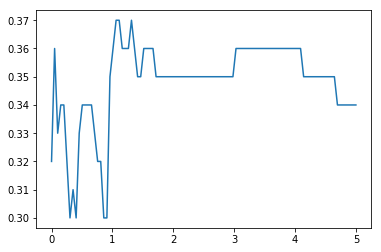

In [32]:
res = perform_IRL_2(optimalAction2, transition_probability, 100.0, lamda_list)
accuracy2 = res['accuracy']
plt.plot(lamda_list, accuracy2)
plt.show()

In [33]:
# extracted_reward1 = np.zeros((100,1))
res = perform_IRL(optimalAction2, transition_probability, 100, lamda_list)
accuracy1 = res['accuracy']

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  1e+03  3e+01  2e+01  1e+00
 1: -2.5466e+00 -0.0000e+00  7e+02  1e+01  9e+00  3e+00
 2: -5.5235e+00 -0.0000e+00  2e+03  1e+01  8e+00  6e+00
 3: -2.0158e+01 -0.0000e+00  8e+03  1e+01  9e+00  2e+01
 4: -1.3025e+02 -0.0000e+00  5e+04  1e+01  9e+00  1e+02
 5: -1.2123e+04 -0.0000e+00  5e+06  1e+01  9e+00  1e+04
 6: -1.2122e+06 -0.0000e+00  5e+08  1e+01  9e+00  1e+06
 7: -1.2122e+08 -0.0000e+00  5e+10  1e+01  9e+00  1e+08
 8: -1.2122e+10 -0.0000e+00  5e+12  1e+01  9e+00  1e+10
Certificate of dual infeasibility found.
0.27
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  1e+03  3e+01  2e+01  1e+00
 1: -2.6737e+00 -0.0000e+00  6e+02  1e+01  8e+00  3e+00
 2: -4.7057e+00 -0.0000e+00  1e+03  1e+01  8e+00  5e+00
 3: -1.5493e+01 -0.0000e+00  5e+03  1e+01  7e+00  2e+01
 4: -7.4475e+01 -0.0000e+00  2e+04  1e+01  7e+00  7e+01
 5: -6.1224e+03 -0.0000e+00  2e+06  1e+01  7e+00  6e+03
 6: -6

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  2e+03  3e+01  2e+01  1e+00
 1: -2.6098e+00 -0.0000e+00  4e+02  1e+01  6e+00  3e+00
 2: -2.1095e+00 -0.0000e+00  1e+02  5e+00  3e+00  2e+00
 3: -1.4159e+00 -0.0000e+00  1e+02  3e+00  2e+00  2e+00
 4: -1.5188e+00 -0.0000e+00  2e+02  2e+00  1e+00  2e+00
 5: -2.6096e+00 -0.0000e+00  3e+02  2e+00  1e+00  3e+00
 6: -1.9776e+01 -0.0000e+00  2e+03  2e+00  9e-01  2e+01
 7: -1.6543e+03 -0.0000e+00  2e+05  2e+00  9e-01  2e+03
 8: -1.6541e+05 -0.0000e+00  2e+07  2e+00  9e-01  2e+05
 9: -1.6541e+07 -0.0000e+00  2e+09  2e+00  9e-01  2e+07
10: -1.6541e+09 -0.0000e+00  2e+11  2e+00  9e-01  2e+09
Certificate of dual infeasibility found.
0.3
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  2e+03  3e+01  2e+01  1e+00
 1: -2.4985e+00 -0.0000e+00  4e+02  1e+01  6e+00  3e+00
 2: -1.9765e+00 -0.0000e+00  1e+02  5e+00  3e+00  2e+00
 3: -1.3080e+00 -0.0000e+00  1e+02  3e+00  2e+00  1e+00
 4: -1.

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  2e+03  3e+01  1e+01  1e+00
 1: -1.5876e+00 -0.0000e+00  3e+02  1e+01  4e+00  2e+00
 2: -1.0145e+00 -0.0000e+00  1e+02  4e+00  2e+00  1e+00
 3: -5.3022e-01 -0.0000e+00  5e+01  3e+00  1e+00  6e-01
 4: -1.4073e-01 -0.0000e+00  1e+01  8e-01  3e-01  2e-01
 5: -1.3631e-02 -0.0000e+00  3e+00  2e-01  9e-02  2e-02
 6: -5.7759e-04 -0.0000e+00  3e-01  2e-02  1e-02  1e-03
 7: -3.8854e-06 -0.0000e+00  3e-03  3e-04  1e-04  1e-05
 8: -3.8843e-08 -0.0000e+00  3e-05  3e-06  1e-06  1e-07
 9: -3.8843e-10 -0.0000e+00  3e-07  3e-08  1e-08  1e-09
10: -3.8843e-12 -0.0000e+00  3e-09  3e-10  1e-10  1e-11
Optimal solution found.
0.37
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  2e+03  3e+01  1e+01  1e+00
 1: -1.5158e+00 -0.0000e+00  3e+02  1e+01  4e+00  2e+00
 2: -9.5455e-01 -0.0000e+00  1e+02  4e+00  2e+00  1e+00
 3: -4.8403e-01 -0.0000e+00  5e+01  3e+00  1e+00  6e-01
 4: -1.1340e-01 -0.0000

 2: -5.0749e-01 -0.0000e+00  9e+01  4e+00  1e+00  6e-01
 3: -1.6593e-01 -0.0000e+00  3e+01  2e+00  5e-01  2e-01
 4: -2.0771e-02 -0.0000e+00  3e+00  2e-01  7e-02  3e-02
 5: -1.7400e-04 -0.0000e+00  6e-02  4e-03  1e-03  3e-04
 6: -1.7389e-06 -0.0000e+00  6e-04  4e-05  1e-05  3e-06
 7: -1.7388e-08 -0.0000e+00  6e-06  4e-07  1e-07  3e-08
 8: -1.7388e-10 -0.0000e+00  6e-08  4e-09  1e-09  3e-10
Optimal solution found.
0.37
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  2e+03  3e+01  9e+00  1e+00
 1: -8.9770e-01 -0.0000e+00  3e+02  9e+00  3e+00  1e+00
 2: -4.8563e-01 -0.0000e+00  9e+01  4e+00  1e+00  6e-01
 3: -1.5234e-01 -0.0000e+00  3e+01  1e+00  4e-01  2e-01
 4: -1.8797e-02 -0.0000e+00  3e+00  2e-01  6e-02  3e-02
 5: -1.6573e-04 -0.0000e+00  5e-02  3e-03  1e-03  3e-04
 6: -1.6562e-06 -0.0000e+00  5e-04  3e-05  1e-05  3e-06
 7: -1.6562e-08 -0.0000e+00  5e-06  3e-07  1e-07  3e-08
 8: -1.6562e-10 -0.0000e+00  5e-08  3e-09  1e-09  3e-10
Optimal solution foun

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  2e+03  3e+01  7e+00  1e+00
 1: -5.7528e-01 -0.0000e+00  3e+02  8e+00  2e+00  8e-01
 2: -2.8665e-01 -0.0000e+00  8e+01  3e+00  7e-01  4e-01
 3: -4.7695e-02 -0.0000e+00  2e+01  8e-01  2e-01  7e-02
 4: -1.7684e-03 -0.0000e+00  6e-01  4e-02  8e-03  3e-03
 5: -1.7729e-05 -0.0000e+00  6e-03  4e-04  8e-05  3e-05
 6: -1.7728e-07 -0.0000e+00  6e-05  4e-06  8e-07  3e-07
 7: -1.7728e-09 -0.0000e+00  6e-07  4e-08  8e-09  3e-09
 8: -1.7728e-11 -0.0000e+00  6e-09  4e-10  8e-11  3e-11
Optimal solution found.
0.37
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  2e+03  3e+01  7e+00  1e+00
 1: -5.5916e-01 -0.0000e+00  3e+02  8e+00  2e+00  8e-01
 2: -2.7934e-01 -0.0000e+00  8e+01  3e+00  7e-01  4e-01
 3: -4.5614e-02 -0.0000e+00  2e+01  8e-01  2e-01  7e-02
 4: -1.5903e-03 -0.0000e+00  6e-01  3e-02  7e-03  3e-03
 5: -1.5928e-05 -0.0000e+00  6e-03  3e-04  7e-05  3e-05
 6: -1.5927e-07 -0.0000

 8: -3.5460e-12 -0.0000e+00  2e-09  9e-11  2e-11  6e-12
Optimal solution found.
0.34
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  2e+03  3e+01  6e+00  1e+00
 1: -3.7703e-01 -0.0000e+00  3e+02  8e+00  1e+00  6e-01
 2: -1.9517e-01 -0.0000e+00  8e+01  3e+00  5e-01  3e-01
 3: -1.8114e-02 -0.0000e+00  1e+01  5e-01  8e-02  3e-02
 4: -3.2791e-04 -0.0000e+00  2e-01  8e-03  2e-03  6e-04
 5: -3.2770e-06 -0.0000e+00  2e-03  8e-05  2e-05  6e-06
 6: -3.2770e-08 -0.0000e+00  2e-05  8e-07  2e-07  6e-08
 7: -3.2770e-10 -0.0000e+00  2e-07  8e-09  2e-09  6e-10
 8: -3.2770e-12 -0.0000e+00  2e-09  8e-11  2e-11  6e-12
Optimal solution found.
0.34
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  2e+03  3e+01  6e+00  1e+00
 1: -3.6658e-01 -0.0000e+00  3e+02  8e+00  1e+00  6e-01
 2: -1.9160e-01 -0.0000e+00  8e+01  3e+00  5e-01  3e-01
 3: -1.7302e-02 -0.0000e+00  1e+01  5e-01  8e-02  3e-02
 4: -3.0227e-04 -0.0000e+00  2e-01  8e-03  1e-03  

 4: -2.3688e-04 -0.0000e+00  2e-01  6e-03  1e-03  4e-04
 5: -2.3676e-06 -0.0000e+00  2e-03  6e-05  1e-05  4e-06
 6: -2.3676e-08 -0.0000e+00  2e-05  6e-07  1e-07  4e-08
 7: -2.3676e-10 -0.0000e+00  2e-07  6e-09  1e-09  4e-10
 8: -2.3676e-12 -0.0000e+00  2e-09  6e-11  1e-11  4e-12
Optimal solution found.
0.33
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  2e+03  3e+01  5e+00  1e+00
 1: -2.6727e-01 -0.0000e+00  3e+02  8e+00  1e+00  5e-01
 2: -1.6004e-01 -0.0000e+00  9e+01  3e+00  4e-01  3e-01
 3: -1.4756e-02 -0.0000e+00  1e+01  4e-01  6e-02  3e-02
 4: -2.3541e-04 -0.0000e+00  2e-01  6e-03  1e-03  4e-04
 5: -2.3530e-06 -0.0000e+00  2e-03  6e-05  1e-05  4e-06
 6: -2.3530e-08 -0.0000e+00  2e-05  6e-07  1e-07  4e-08
 7: -2.3530e-10 -0.0000e+00  2e-07  6e-09  1e-09  4e-10
 8: -2.3530e-12 -0.0000e+00  2e-09  6e-11  1e-11  4e-12
Optimal solution found.
0.33
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  2e+03  3e+01  5e+00  

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  2e+03  3e+01  4e+00  1e+00
 1: -2.1094e-01 -0.0000e+00  3e+02  8e+00  1e+00  5e-01
 2: -1.4683e-01 -0.0000e+00  1e+02  3e+00  4e-01  2e-01
 3: -1.4389e-02 -0.0000e+00  1e+01  4e-01  5e-02  3e-02
 4: -2.0483e-04 -0.0000e+00  2e-01  6e-03  7e-04  4e-04
 5: -2.0475e-06 -0.0000e+00  2e-03  6e-05  7e-06  4e-06
 6: -2.0475e-08 -0.0000e+00  2e-05  6e-07  7e-08  4e-08
 7: -2.0475e-10 -0.0000e+00  2e-07  6e-09  7e-10  4e-10
 8: -2.0475e-12 -0.0000e+00  2e-09  6e-11  7e-12  4e-12
Optimal solution found.
0.32
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  2e+03  3e+01  4e+00  1e+00
 1: -2.0772e-01 -0.0000e+00  3e+02  8e+00  1e+00  5e-01
 2: -1.4628e-01 -0.0000e+00  1e+02  3e+00  4e-01  2e-01
 3: -1.4345e-02 -0.0000e+00  1e+01  4e-01  5e-02  3e-02
 4: -2.0242e-04 -0.0000e+00  2e-01  5e-03  7e-04  4e-04
 5: -2.0234e-06 -0.0000e+00  2e-03  5e-05  7e-06  4e-06
 6: -2.0234e-08 -0.0000

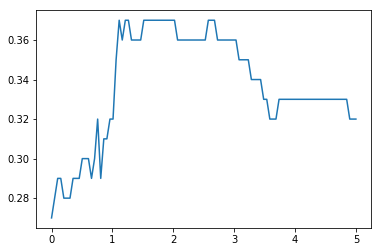

In [34]:
# plot 
plt.plot(lamda_list, accuracy1)
plt.show()

### Q12 find lamda max###

In [35]:
max_accuracy1 = max(accuracy1)
maxLamda = lamda_list[accuracy1.index(max_accuracy1)]
print(maxLamda, max_accuracy1)

1.1111111111111112 0.37


In [36]:
def lp_irl(trans_probs, policy, lamda_list, Rmax):
    def T(a, s):
        return np.dot(trans_probs[int(policy[s]), s] -trans_probs[a, s],
                      np.linalg.inv(np.eye(n_states) - gamma*trans_probs[int(policy[s])]))
    gamma = 0.8
    l1 = lamda_list[0]
    n_states = 100
    n_actions = 4
    A = set(range(n_actions))
    ones_s = np.ones(n_states)
    eye_ss = np.eye(n_states)
    zero_s = np.zeros(n_states)
    zero_ss = np.zeros((n_states, n_states))
#     T = lambda a, s: np.dot(tp[int(policy[s]), s] - tp[a, s], np.linalg.inv(eye_ss - gamma * tp[int(policy[s])]))
   
    c = -np.r_[zero_s, ones_s, -l1 * ones_s]
    zero_stack = np.zeros((n_states * (n_actions - 1), n_states))
    T_stack = np.vstack([-T(a, s) for s in range(n_states) for a in A - {policy[s]}])
    I_stack = np.vstack([np.eye(1, n_states, s) for s in range(n_states) for a in A - {policy[s]}])

    A_ub = np.bmat([[T_stack, I_stack, zero_stack],    # -TR <= t
                    [T_stack, zero_stack, zero_stack], # -TR <= 0
                    [-eye_ss, zero_ss, -eye_ss],  # -R <= u
                    [eye_ss, zero_ss, -eye_ss],   # R <= u
                    [-eye_ss, zero_ss, zero_ss],  # -R <= Rmax
                    [eye_ss, zero_ss, zero_ss]])  # R <= Rmax
    b = np.vstack([np.zeros((n_states * (n_actions-1) * 2 + 2 * n_states, 1)),
                   Rmax * np.ones((2 * n_states, 1))])
    results = linprog(c, A_ub, b)

    return results["x"][:n_states]

### Q13 generate heat maps of the ground truth and extracted reward###

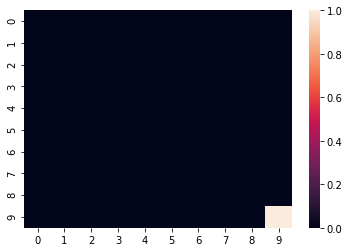

In [37]:
hm_rfunc1 = sns.heatmap(Rfunc1)

In [38]:
# extracted_reward_max_lamda1 = np.zeros((100,1))
res = perform_IRL(optimalAction1, transition_probability, Rmax1, [maxLamda])
extracted_reward_max_lamda1 = res['reward'].reshape((height,width))
print(extracted_reward_max_lamda1)

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  2e+03  3e+01  1e+01  1e+00
 1: -1.8738e+00 -0.0000e+00  3e+02  9e+00  3e+00  2e+00
 2: -9.9141e-01 -0.0000e+00  6e+01  3e+00  1e+00  1e+00
 3: -1.3406e-01 -0.0000e+00  1e+01  7e-01  2e-01  2e-01
 4: -1.8696e-02 -0.0000e+00  2e+00  1e-01  5e-02  2e-02
 5:  5.2354e-05 -0.0000e+00  1e-01  1e-02  3e-03  3e-04
 6:  5.2966e-07 -0.0000e+00  1e-03  1e-04  3e-05  3e-06
 7:  5.2962e-09 -0.0000e+00  1e-05  1e-06  3e-07  3e-08
 8:  5.2962e-11 -0.0000e+00  1e-07  1e-08  3e-09  3e-10
Optimal solution found.
0.65
[[-2.80479197e-09 -1.25271316e-09 -1.81662661e-09 -8.83472612e-10
  -4.53476525e-10 -4.46658959e-10 -1.18997735e-10  4.81058118e-11
  -2.18412900e-11  3.52089629e-10]
 [-2.53157554e-09 -2.47981554e-09 -2.29000728e-09 -5.30755071e-10
  -6.81704994e-10 -5.42335100e-11  6.37916927e-11  8.05523472e-12
   9.11006520e-12  4.93474572e-11]
 [-1.73854473e-09 -1.53003212e-09 -2.16443818e-09 -1.22641299e-09
  -8.38759131

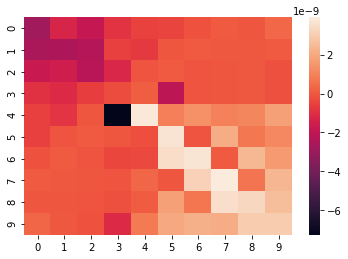

In [39]:
# print(extracted_reward_max_lamda1.reshape((height, width)))
hm_er1 = sns.heatmap(extracted_reward_max_lamda1)

### Q14 compute the optimal values of the states with extracted reward and generate heatmap ###

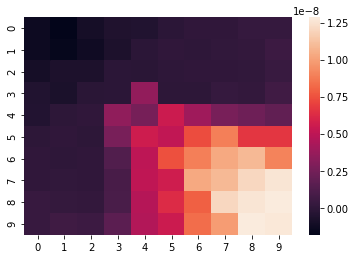

In [40]:
Vs_max_lamda1 = np.zeros(height * width)
calVs(Vs_max_lamda1, tp, extracted_reward_max_lamda1, discount, theta)
Vs_max_lamda1_2d = Vs_max_lamda1.reshape((height, width))
hm_vs = sns.heatmap(Vs_max_lamda1_2d)

### Q16 Use the extracted reward function found in question 13 to compute the optimal policy of the agent. ###

In [41]:
optimalAction_max_lamda1 = np.zeros(height * width)
calOptimalAction(optimalAction_max_lamda1, tp,extracted_reward_max_lamda1 , Vs_max_lamda1, discount)
optimalAction_max_lamda1_2d = optimalAction_max_lamda1.reshape((height, width))
arrows_max_lamda1 = action2Arrow(optimalAction_max_lamda1, arrows)
path_max_lamda1 = np.array(arrows_max_lamda1).reshape((height,width)).T
print(tabulate(optimalAction_max_lamda1_2d.T,  tablefmt='fancy_grid'))
print(tabulate(path_max_lamda1))

╒═══╤═══╤═══╤═══╤═══╤═══╤═══╤═══╤═══╤═══╕
│ 1 │ 0 │ 1 │ 1 │ 1 │ 2 │ 1 │ 1 │ 1 │ 0 │
├───┼───┼───┼───┼───┼───┼───┼───┼───┼───┤
│ 2 │ 0 │ 1 │ 1 │ 1 │ 1 │ 1 │ 1 │ 1 │ 0 │
├───┼───┼───┼───┼───┼───┼───┼───┼───┼───┤
│ 2 │ 2 │ 2 │ 1 │ 2 │ 2 │ 2 │ 2 │ 2 │ 2 │
├───┼───┼───┼───┼───┼───┼───┼───┼───┼───┤
│ 2 │ 1 │ 2 │ 1 │ 2 │ 2 │ 2 │ 2 │ 2 │ 2 │
├───┼───┼───┼───┼───┼───┼───┼───┼───┼───┤
│ 2 │ 2 │ 2 │ 1 │ 1 │ 2 │ 2 │ 2 │ 2 │ 2 │
├───┼───┼───┼───┼───┼───┼───┼───┼───┼───┤
│ 1 │ 2 │ 2 │ 1 │ 1 │ 2 │ 2 │ 2 │ 2 │ 2 │
├───┼───┼───┼───┼───┼───┼───┼───┼───┼───┤
│ 2 │ 2 │ 3 │ 1 │ 1 │ 1 │ 2 │ 2 │ 2 │ 2 │
├───┼───┼───┼───┼───┼───┼───┼───┼───┼───┤
│ 2 │ 2 │ 1 │ 1 │ 1 │ 1 │ 1 │ 2 │ 2 │ 2 │
├───┼───┼───┼───┼───┼───┼───┼───┼───┼───┤
│ 2 │ 2 │ 2 │ 1 │ 1 │ 1 │ 1 │ 1 │ 2 │ 3 │
├───┼───┼───┼───┼───┼───┼───┼───┼───┼───┤
│ 2 │ 3 │ 3 │ 1 │ 1 │ 1 │ 1 │ 1 │ 0 │ 3 │
╘═══╧═══╧═══╧═══╧═══╧═══╧═══╧═══╧═══╧═══╛
-  -  -  -  -  -  -  -  -  -
0  1  0  0  0  3  0  0  0  1
3  1  0  0  0  0  0  0  0  1
3  3  3  0  3  3  3  3  3  3
3 

### Q18 ###

In [42]:
Rmax2 = 0
for i in range(0,10):
    for j in range(0,10):
        Rmax2 = max(Rmax2, abs(Rfunc2[i,j]))    
# Rmax = Rfunc2.max()
print(Rmax2)


100.0


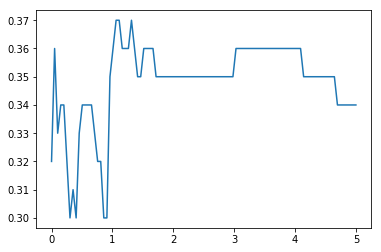

In [ ]:
# Q18
plt.plot(lamda_list, accuracy2)
plt.show()

In [ ]:
# Q19
# print(optimalAction2)
res = perform_IRL(optimalAction2, transition_probability, 100, lamda_list)
print(res['reward'])
accuracy2 = res['accuracy']


     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  1e+03  3e+01  2e+01  1e+00
 1: -2.5466e+00 -0.0000e+00  7e+02  1e+01  9e+00  3e+00
 2: -5.5235e+00 -0.0000e+00  2e+03  1e+01  8e+00  6e+00
 3: -2.0158e+01 -0.0000e+00  8e+03  1e+01  9e+00  2e+01
 4: -1.3025e+02 -0.0000e+00  5e+04  1e+01  9e+00  1e+02
 5: -1.2123e+04 -0.0000e+00  5e+06  1e+01  9e+00  1e+04
 6: -1.2122e+06 -0.0000e+00  5e+08  1e+01  9e+00  1e+06
 7: -1.2122e+08 -0.0000e+00  5e+10  1e+01  9e+00  1e+08
 8: -1.2122e+10 -0.0000e+00  5e+12  1e+01  9e+00  1e+10
Certificate of dual infeasibility found.
0.27
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  1e+03  3e+01  2e+01  1e+00
 1: -2.6737e+00 -0.0000e+00  6e+02  1e+01  8e+00  3e+00
 2: -4.7057e+00 -0.0000e+00  1e+03  1e+01  8e+00  5e+00
 3: -1.5493e+01 -0.0000e+00  5e+03  1e+01  7e+00  2e+01
 4: -7.4475e+01 -0.0000e+00  2e+04  1e+01  7e+00  7e+01
 5: -6.1224e+03 -0.0000e+00  2e+06  1e+01  7e+00  6e+03
 6: -6

0.29
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  2e+03  3e+01  2e+01  1e+00
 1: -2.6098e+00 -0.0000e+00  4e+02  1e+01  6e+00  3e+00
 2: -2.1095e+00 -0.0000e+00  1e+02  5e+00  3e+00  2e+00
 3: -1.4159e+00 -0.0000e+00  1e+02  3e+00  2e+00  2e+00
 4: -1.5188e+00 -0.0000e+00  2e+02  2e+00  1e+00  2e+00
 5: -2.6096e+00 -0.0000e+00  3e+02  2e+00  1e+00  3e+00
 6: -1.9776e+01 -0.0000e+00  2e+03  2e+00  9e-01  2e+01
 7: -1.6543e+03 -0.0000e+00  2e+05  2e+00  9e-01  2e+03
 8: -1.6541e+05 -0.0000e+00  2e+07  2e+00  9e-01  2e+05
 9: -1.6541e+07 -0.0000e+00  2e+09  2e+00  9e-01  2e+07
10: -1.6541e+09 -0.0000e+00  2e+11  2e+00  9e-01  2e+09
Certificate of dual infeasibility found.
0.3
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  2e+03  3e+01  2e+01  1e+00
 1: -2.4985e+00 -0.0000e+00  4e+02  1e+01  6e+00  3e+00
 2: -1.9765e+00 -0.0000e+00  1e+02  5e+00  3e+00  2e+00
 3: -1.3080e+00 -0.0000e+00  1e+02  3e+00  2e+00  1e+00
 4

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  2e+03  3e+01  1e+01  1e+00
 1: -1.5876e+00 -0.0000e+00  3e+02  1e+01  4e+00  2e+00
 2: -1.0145e+00 -0.0000e+00  1e+02  4e+00  2e+00  1e+00
 3: -5.3022e-01 -0.0000e+00  5e+01  3e+00  1e+00  6e-01
 4: -1.4073e-01 -0.0000e+00  1e+01  8e-01  3e-01  2e-01
 5: -1.3631e-02 -0.0000e+00  3e+00  2e-01  9e-02  2e-02
 6: -5.7759e-04 -0.0000e+00  3e-01  2e-02  1e-02  1e-03
 7: -3.8854e-06 -0.0000e+00  3e-03  3e-04  1e-04  1e-05
 8: -3.8843e-08 -0.0000e+00  3e-05  3e-06  1e-06  1e-07
 9: -3.8843e-10 -0.0000e+00  3e-07  3e-08  1e-08  1e-09
10: -3.8843e-12 -0.0000e+00  3e-09  3e-10  1e-10  1e-11
Optimal solution found.
0.37
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  2e+03  3e+01  1e+01  1e+00
 1: -1.5158e+00 -0.0000e+00  3e+02  1e+01  4e+00  2e+00
 2: -9.5455e-01 -0.0000e+00  1e+02  4e+00  2e+00  1e+00
 3: -4.8403e-01 -0.0000e+00  5e+01  3e+00  1e+00  6e-01
 4: -1.1340e-01 -0.0000

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  2e+03  3e+01  9e+00  1e+00
 1: -9.3046e-01 -0.0000e+00  3e+02  1e+01  3e+00  1e+00
 2: -5.0749e-01 -0.0000e+00  9e+01  4e+00  1e+00  6e-01
 3: -1.6593e-01 -0.0000e+00  3e+01  2e+00  5e-01  2e-01
 4: -2.0771e-02 -0.0000e+00  3e+00  2e-01  7e-02  3e-02
 5: -1.7400e-04 -0.0000e+00  6e-02  4e-03  1e-03  3e-04
 6: -1.7389e-06 -0.0000e+00  6e-04  4e-05  1e-05  3e-06
 7: -1.7388e-08 -0.0000e+00  6e-06  4e-07  1e-07  3e-08
 8: -1.7388e-10 -0.0000e+00  6e-08  4e-09  1e-09  3e-10
Optimal solution found.
0.37
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  2e+03  3e+01  9e+00  1e+00
 1: -8.9770e-01 -0.0000e+00  3e+02  9e+00  3e+00  1e+00
 2: -4.8563e-01 -0.0000e+00  9e+01  4e+00  1e+00  6e-01
 3: -1.5234e-01 -0.0000e+00  3e+01  1e+00  4e-01  2e-01
 4: -1.8797e-02 -0.0000e+00  3e+00  2e-01  6e-02  3e-02
 5: -1.6573e-04 -0.0000e+00  5e-02  3e-03  1e-03  3e-04
 6: -1.6562e-06 -0.0000

In [ ]:
# Q19
max_accuracy2 = max(accuracy2)
maxLamda2 = lamda_list[accuracy2.index(max_accuracy2)]
print(maxLamda2, max_accuracy2)

In [ ]:
# Q20
hm_rfunc2 = sns.heatmap(Rfunc2)


In [ ]:
res = perform_IRL(optimalAction2, transition_probability, Rmax2, [maxLamda2])
extracted_reward_max_lamda2 = res['reward'].reshape((height,width))
hm_er1 = sns.heatmap(extracted_reward_max_lamda2)

In [ ]:
#Q21
Vs_max_lamda2 = np.zeros(height * width)
calVs(Vs_max_lamda2, tp, extracted_reward_max_lamda2, discount, theta)
Vs_max_lamda2_2d = Vs_max_lamda2.reshape((height, width))
hm_vs = sns.heatmap(Vs_max_lamda2_2d)

In [ ]:
#Q23
optimalAction_max_lamda2 = np.zeros(height * width)
calOptimalAction(optimalAction_max_lamda2, tp,extracted_reward_max_lamda2 , Vs_max_lamda2, discount)
optimalAction_max_lamda2_2d = optimalAction_max_lamda2.reshape((height, width))
arrows_max_lamda2 = action2Arrow(optimalAction_max_lamda2, arrows)
path_max_lamda2 = np.array(arrows_max_lamda2).reshape((height,width)).T
print(tabulate(optimalAction_max_lamda2_2d.T,  tablefmt='fancy_grid'))
print(tabulate(path_max_lamda2))